In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df2=pd.read_csv('Salary_Data.csv')
df2.head()

,YearsExperience,Salary
0,1.1,39343.0
1,1.3,46205.0
2,1.5,37731.0
3,2.0,43525.0
4,2.2,39891.0


In [3]:
df2.describe()

,YearsExperience,Salary
count,30.000000,30.000000
mean,5.313333,76003.000000
std,2.837888,27414.429785
min,1.100000,37731.000000
25%,3.200000,56720.750000
50%,4.700000,65237.000000
75%,7.700000,100544.750000
max,10.500000,122391.000000


In [4]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30 entries, 0 to 29
Data columns (total 2 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   YearsExperience  30 non-null     float64
 1   Salary           30 non-null     float64
dtypes: float64(2)
memory usage: 608.0 bytes


In [5]:
import warnings
warnings.filterwarnings('ignore')

<AxesSubplot:xlabel='YearsExperience', ylabel='Density'>

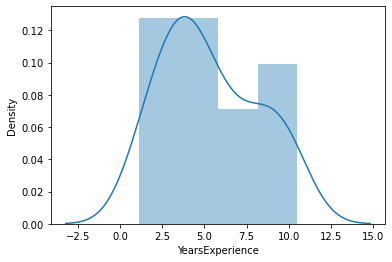

In [6]:
sns.distplot(df2['YearsExperience'])

In [7]:
df2['YearsExperience'].skew()

0.37956024064804106

## Applying transformation
### Root Transformation

-0.310691963821925

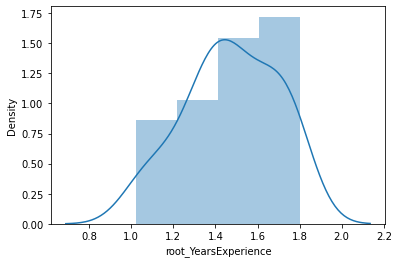

In [8]:
df2['root_YearsExperience']=df2['YearsExperience']**(1/4)
sns.distplot(df2['root_YearsExperience'])
df2['root_YearsExperience'].skew()

## log Transformation

-0.34626399208447334

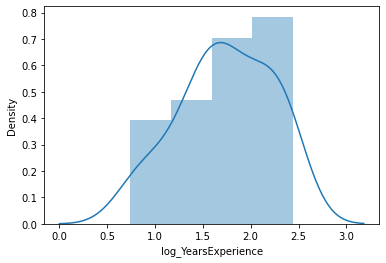

In [10]:
df2['log_YearsExperience']=np.log(df2['YearsExperience']+1)
sns.distplot(df2['log_YearsExperience'])
df2['log_YearsExperience'].skew()

## Reciprocal transformation

1.234705009831716

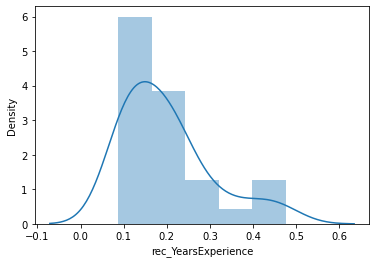

In [11]:
df2['rec_YearsExperience']=1/(df2['YearsExperience']+1)
sns.distplot(df2['rec_YearsExperience'])
df2['rec_YearsExperience'].skew()

<AxesSubplot:xlabel='Salary', ylabel='Density'>

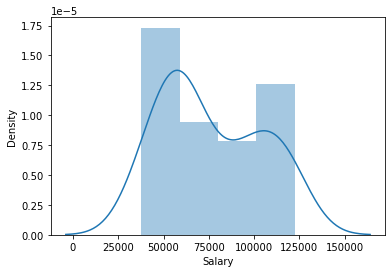

In [12]:
sns.distplot(df2['Salary'])

In [13]:
df2.corr()

,YearsExperience,Salary,root_YearsExperience,log_YearsExperience,rec_YearsExperience
YearsExperience,1.000000,0.978242,0.975453,0.972854,-0.885693
Salary,0.978242,1.000000,0.948258,0.945814,-0.850888
root_YearsExperience,0.975453,0.948258,1.000000,0.999902,-0.965613
log_YearsExperience,0.972854,0.945814,0.999902,1.000000,-0.968034
rec_YearsExperience,-0.885693,-0.850888,-0.965613,-0.968034,1.000000


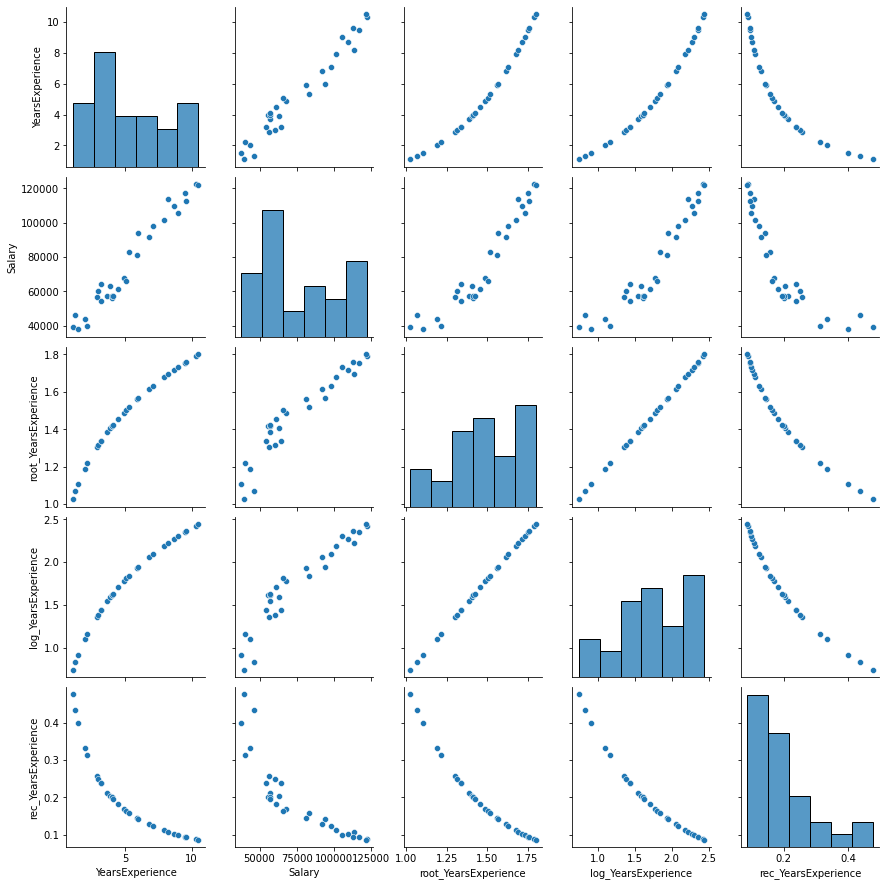

In [14]:
sns.pairplot(df2)

In [15]:
import statsmodels.formula.api as smf
model2=smf.ols('Salary~YearsExperience',data=df2).fit()
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                 Salary   R-squared:                       0.957
Model:                            OLS   Adj. R-squared:                  0.955
Method:                 Least Squares   F-statistic:                     622.5
Date:                Wed, 12 Oct 2022   Prob (F-statistic):           1.14e-20
Time:                        22:03:13   Log-Likelihood:                -301.44
No. Observations:                  30   AIC:                             606.9
Df Residuals:                      28   BIC:                             609.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===================================================================================
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        2.579e+04   2273.053     11.347      0.000    2.11e+04    3.04e+04
YearsExperience  9449.9623    378.755     24.950      0.000    8674.119    1.02e+04
==============================================================================
Omnibus:                        2.140   Durbin-Watson:                   1.648
Prob(Omnibus):                  0.343   Jarque-Bera (JB):                1.569
Skew:                           0.363   Prob(JB):                        0.456
Kurtosis:                       2.147   Cond. No.                         13.2
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

<AxesSubplot:xlabel='YearsExperience', ylabel='Salary'>

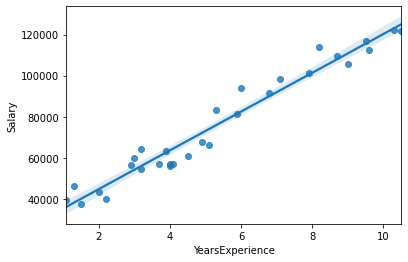

In [16]:
sns.regplot(x='YearsExperience',y='Salary',data=df2)

# Residual Analysis

In [17]:
df2_analysis=pd.DataFrame({'Predicted_values':model2.fittedvalues,'Residuals':model2.resid})
df2_analysis

,Predicted_values,Residuals
0,36187.158752,3155.841248
1,38077.151217,8127.848783
2,39967.143681,-2236.143681
3,44692.124842,-1167.124842
4,46582.117306,-6691.117306
5,53197.090931,3444.909069
6,54142.087163,6007.912837
7,56032.079627,-1587.079627
8,56032.079627,8412.920373
9,60757.060788,-3568.060788


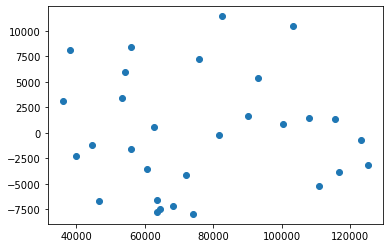

In [18]:
plt.scatter(model2.fittedvalues,model2.resid)

<AxesSubplot:ylabel='Density'>

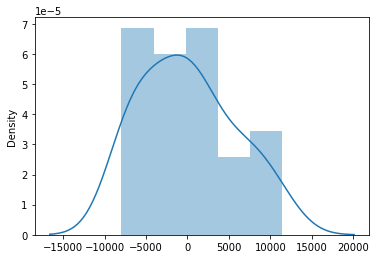

In [19]:
sns.distplot(model2.resid)

In [20]:
model2.resid.mean()

-1.5036979069312415e-11

# Prediction

In [21]:
df2_new=pd.Series([2,3,4])
df2_new

0    2
1    3
2    4
dtype: int64

In [22]:
df2_pred=pd.DataFrame(df2_new,columns=['YearsExperience'])
df2_pred

,YearsExperience
0,2
1,3
2,4


In [23]:
model2.predict(df2_pred)

0    44692.124842
1    54142.087163
2    63592.049484
dtype: float64